# ***Installing Necessary Libraries***

In [91]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
from newsapi import NewsApiClient
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import textblob

# Fetching Data From API 

In [93]:
newsapi = NewsApiClient(api_key='abf0403080a343a88d92612df09ae39e')

In [94]:
all_articles = newsapi.get_everything(q='ronaldo',
                                      from_param='2022-12-01',
                                      to='2022-12-22',language='en')

In [95]:
all_articles

{'status': 'ok',
 'totalResults': 3739,
 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
   'author': None,
   'title': "World Cup 2022: 'Cristiano Ronaldo reduced to role of superstar nobody wants'",
   'description': "Cristiano Ronaldo is reduced to the role of the superstar nobody wants as Portugal follow Man Utd's lead in deciding they might just be better off without him, writes Phil McNulty",
   'url': 'https://www.bbc.co.uk/sport/football/63882676',
   'urlToImage': 'https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/6537/production/_127911952_cristianoronaldo.jpg',
   'publishedAt': '2022-12-06T22:51:51Z',
   'content': "Cristiano Ronaldo wasn't named in Portugal's starting XI for a game at a major tournament for the first time since 2008\r\nCristiano Ronaldo was reduced to the role of the superstar nobody wants after … [+5383 chars]"},
  {'source': {'id': None, 'name': 'The Guardian'},
   'author': 'PA Media',
   'title': 'Portugal coach had ‘frank conv

# ***Extracting Useful Information from fetched Data***

In [96]:
DF = pd.DataFrame.from_dict(all_articles)
DF

,status,totalResults,articles
0,ok,3739,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."
1,ok,3739,"{'source': {'id': None, 'name': 'The Guardian'..."
2,ok,3739,"{'source': {'id': None, 'name': 'Sportsnet.ca'..."
3,ok,3739,"{'source': {'id': 'reuters', 'name': 'Reuters'..."
4,ok,3739,"{'source': {'id': 'reuters', 'name': 'Reuters'..."
...,...,...,...
95,ok,3739,"{'source': {'id': None, 'name': 'HYPEBEAST'}, ..."
96,ok,3739,"{'source': {'id': None, 'name': 'The Guardian'..."
97,ok,3739,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."
98,ok,3739,"{'source': {'id': 'bbc-news', 'name': 'BBC New..."


In [97]:
DF['articles']

0     {'source': {'id': 'bbc-news', 'name': 'BBC New...
1     {'source': {'id': None, 'name': 'The Guardian'...
2     {'source': {'id': None, 'name': 'Sportsnet.ca'...
3     {'source': {'id': 'reuters', 'name': 'Reuters'...
4     {'source': {'id': 'reuters', 'name': 'Reuters'...
                            ...                        
95    {'source': {'id': None, 'name': 'HYPEBEAST'}, ...
96    {'source': {'id': None, 'name': 'The Guardian'...
97    {'source': {'id': 'bbc-news', 'name': 'BBC New...
98    {'source': {'id': 'bbc-news', 'name': 'BBC New...
99    {'source': {'id': None, 'name': 'The Guardian'...
Name: articles, Length: 100, dtype: object

In [98]:
DF = pd.DataFrame.from_dict(all_articles)
df=DF['articles'].apply(pd.Series)
DF= df[["description", "content"]]


In [99]:
df

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'bbc-news', 'name': 'BBC News'}",None,World Cup 2022: 'Cristiano Ronaldo reduced to ...,Cristiano Ronaldo is reduced to the role of th...,https://www.bbc.co.uk/sport/football/63882676,https://ichef.bbci.co.uk/live-experience/cps/6...,2022-12-06T22:51:51Z,Cristiano Ronaldo wasn't named in Portugal's s...
1,"{'id': None, 'name': 'The Guardian'}",PA Media,Portugal coach had ‘frank conversation’ with R...,<ul><li>Fernando Santos says Ronaldo not happy...,https://www.theguardian.com/football/2022/dec/...,https://i.guim.co.uk/img/media/76cdcc3f6424233...,2022-12-09T14:03:14Z,"Portugals coach, Fernando Santos, has revealed..."
2,"{'id': None, 'name': 'Sportsnet.ca'}",None,Cristiano Ronaldo says his dream of winning Wo...,<ol><li>Cristiano Ronaldo says his dream of wi...,https://www.sportsnet.ca/soccer/article/cristi...,https://www.sportsnet.ca/wp-content/uploads/20...,2022-12-11T16:24:00Z,Portugal's Cristiano Ronaldo reacts after miss...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Ronaldo denies he swore at Portugal coach over...,Cristiano Ronaldo denied that he had sworn at ...,https://www.reuters.com/lifestyle/sports/ronal...,https://www.reuters.com/resizer/2RCdelsY9gIY0R...,2022-12-02T19:33:00Z,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Cristiano ..."
4,"{'id': 'reuters', 'name': 'Reuters'}",None,Ronaldo leads Portugal against South Korea aft...,Captain Cristiano Ronaldo will lead Portugal's...,https://www.reuters.com/lifestyle/sports/ronal...,https://www.reuters.com/resizer/PvLJzKbHs8G2Mx...,2022-12-02T14:09:00Z,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Captain Cr..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'HYPEBEAST'}",info@hypebeast.com (Hypebeast),Cristiano Ronaldo Joins Jacob & Co. for Two Ne...,"Celebrating two decades of collaboration, Cris...",https://hypebeast.com/2022/12/cristiano-ronald...,https://image-cdn.hypb.st/https%3A%2F%2Fhypebe...,2022-12-06T16:42:41Z,"Celebrating two decades of collaboration, Cris..."
96,"{'id': None, 'name': 'The Guardian'}",Dan Milmo Global technology editor,Harry Kane most abused England player on Twitt...,"Exclusive: England players received 1,546 abus...",https://www.theguardian.com/technology/2022/de...,https://i.guim.co.uk/img/media/64587ad1c0ade64...,2022-12-02T11:48:28Z,Harry Kane was the most abused England player ...
97,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Ronaldo replacement Ramos runs riot for Portugal,Watch his best moments as 21-year-old Goncalo ...,https://www.bbc.co.uk/sport/av/football/63881741,https://ichef.bbci.co.uk/news/1024/cpsprodpb/6...,2022-12-06T21:55:15Z,Watch his best moments as 21-year-old Goncalo ...
98,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Ronaldo coy on international future with Portugal,Portugal captain Cristiano Ronaldo is coy abou...,https://www.bbc.co.uk/sport/football/63937916,https://ichef.bbci.co.uk/live-experience/cps/6...,2022-12-11T19:44:59Z,Full time scenes as Morocco become the first A...


In [100]:
DF= df[["description", "content"]]
#DF

# ***Preprocessing the Information***

In [101]:
DF['description'] = DF['description'].str.replace(r'<[^<>]*>', '', regex=True)
DF['content'] = DF['content'].str.replace(r'<[^<>]*>', '', regex=True)
DF = DF.replace(r'\n',' ', regex=True) 
DF = DF.replace(r'\r',' ', regex=True) 

<ipython-input-101-6bbe960c867e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['description'] = DF['description'].str.replace(r'<[^<>]*>', '', regex=True)
<ipython-input-101-6bbe960c867e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['content'] = DF['content'].str.replace(r'<[^<>]*>', '', regex=True)


In [102]:
DF

,description,content
0,Cristiano Ronaldo is reduced to the role of th...,Cristiano Ronaldo wasn't named in Portugal's s...
1,Fernando Santos says Ronaldo not happy and que...,"Portugals coach, Fernando Santos, has revealed..."
2,Cristiano Ronaldo says his dream of winning Wo...,Portugal's Cristiano Ronaldo reacts after miss...
3,Cristiano Ronaldo denied that he had sworn at ...,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Cristiano ..."
4,Captain Cristiano Ronaldo will lead Portugal's...,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Captain Cr..."
...,...,...
95,"Celebrating two decades of collaboration, Cris...","Celebrating two decades of collaboration, Cris..."
96,"Exclusive: England players received 1,546 abus...",Harry Kane was the most abused England player ...
97,Watch his best moments as 21-year-old Goncalo ...,Watch his best moments as 21-year-old Goncalo ...
98,Portugal captain Cristiano Ronaldo is coy abou...,Full time scenes as Morocco become the first A...


# ***Evaluating The Sentiments***

In [103]:
l_des=[]
for i in range (0,100):
  text=DF['description'][i]
  blob=TextBlob(text)
  senti=blob.sentiment.polarity
  l_des.append(senti)

In [104]:
l_cont=[]
for i in range (0,100):
  text=DF['content'][i]
  blob=TextBlob(text)
  senti=blob.sentiment.polarity
  l_cont.append(senti)

In [105]:
DF['description_sentiment'] = pd.Series(l_des)
DF['cont_sentiment'] = pd.Series(l_cont)
DF

,description,content,description_sentiment,cont_sentiment
0,Cristiano Ronaldo is reduced to the role of th...,Cristiano Ronaldo wasn't named in Portugal's s...,0.350000,0.022500
1,Fernando Santos says Ronaldo not happy and que...,"Portugals coach, Fernando Santos, has revealed...",-0.400000,0.800000
2,Cristiano Ronaldo says his dream of winning Wo...,Portugal's Cristiano Ronaldo reacts after miss...,0.066667,-0.200000
3,Cristiano Ronaldo denied that he had sworn at ...,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Cristiano ...",-0.058333,-0.433333
4,Captain Cristiano Ronaldo will lead Portugal's...,"AL RAYYAN, Qatar, Dec 2 (Reuters) - Captain Cr...",0.000000,0.000000
...,...,...,...,...
95,"Celebrating two decades of collaboration, Cris...","Celebrating two decades of collaboration, Cris...",0.050000,0.100000
96,"Exclusive: England players received 1,546 abus...",Harry Kane was the most abused England player ...,0.100000,0.100000
97,Watch his best moments as 21-year-old Goncalo ...,Watch his best moments as 21-year-old Goncalo ...,0.500000,0.500000
98,Portugal captain Cristiano Ronaldo is coy abou...,Full time scenes as Morocco become the first A...,0.000000,0.200000


In [106]:
l_cont_p=[]
l_cont_n=[]
for i in l_cont:
  if (i>0.000000):
      l_cont_p.append(i)
  else:
    l_cont_n.append(i)

In [107]:
l_des_p=[]
l_des_n=[]
for i in l_des:
  if (i>0.000000):
      l_des_p.append(i)
  else:
    l_des_n.append(i)

<BarContainer object of 2 artists>

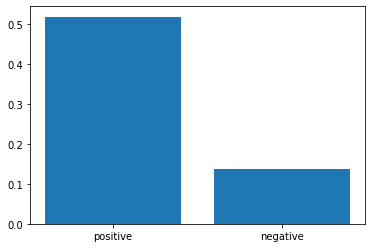

In [108]:
sumP=((sum(l_cont_p))/len(l_cont_p))+ ((sum(l_des_p))/len(l_des_p))
sumN=((sum(l_cont_n))/len(l_cont_n))+((sum(l_des_n))/len(l_des_n))
Result=np.array([sumP,abs(sumN)])
label=["positive","negative"]
plt.bar(label,Result)

# ***Converting the segments into a single Python Program***

Enter Topic : Kanye West
                                          description  \
0   Kanye West has been banned from Twitter after ...   
1   Parler announced Thursday it reached a mutual ...   
2   Hear Tapper's question for politicians who won...   
3   Twitter has restored the account of Andrew Ang...   
4   Kanye West is currently banned from the platfo...   
..                                                ...   
95  Before the planned interview, Adin Ross, who i...   
96  The Virginia rapper was named the label’s pres...   
97  We thank our sponsor for making this content p...   
98  The Brooklyn Nets star had a partnership with ...   
99  West appeared to promote his supposed presiden...   

                                              content  
0   Kanye West has been banned from Twitter after ...  
1   Ye:  Hello.... ELON! Good to hear from you. Ye...  
2   Your browser isnt supported anymore. Update it...  
3   Twitter has restored the account of Andrew Ang...  
4   Twitte

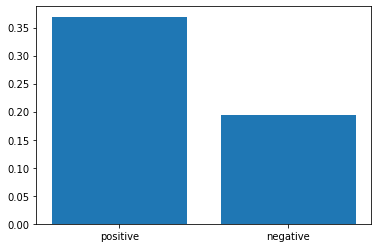

Enter Topic : China
                                          description  \
0   Shein will use the $15 million on physical upg...   
1   Apple’s next iOS update will tighten AirDrop s...   
2   ARM won't sell its latest Neoverse V series ch...   
3   Oppo has announced a pair of new foldables, an...   
4   China announced on Wednesday the country’s str...   
..                                                ...   
95  China's passenger vehicle sales totalled 1.67 ...   
96  China reported 8,838 new COVID-19 infections f...   
97  China reported 2,157 new symptomatic COVID-19 ...   
98  America’s chip war against China will make onl...   
99  He Jiankui discusses his plans for finding cur...   

                                              content  
0   Shein will spend $15 million on improving stan...  
1   Apples next iOS update will tighten AirDrop se...  
2   ARM won't sell its latest Neoverse V series ch...  
3   Oppos next foldable is actually getting a rele...  
4   China annou

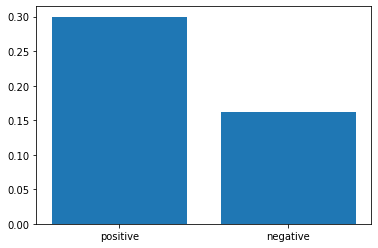

Enter Topic : Putin
                                          description  \
0   Members of the United States Congress, Republi...   
1   The Russian president has vowed to continue at...   
2   The UK wants better relations with nations whi...   
3   Joe Biden says he is willing to sit down with ...   
4   This will be Ukraine's first Christmas since R...   
..                                                ...   
95  The Kerch Bridge, which connects occupied Crim...   
96  Russia is calling on Ukraine to accept "realit...   
97  Europe just set a $60 price cap on Moscow's oi...   
98  "I think this war is Putin's grave," Russian c...   
99  Russia's war in Ukraine is making a new power ...   

                                              content  
0   Editors Note: Frida Ghitis, (@fridaghitis) a f...  
1   Vladimir Putin has vowed to continue attacking...  
2   If you're reading this in a cold house in the ...  
3   What does it mean when US President Joe Biden ...  
4   Editors Not

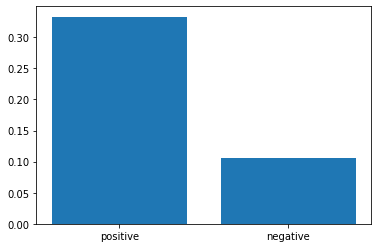

Enter Topic : USA
                                          description  \
0   When Eugene, Oregon, known as "Tracktown, USA"...   
1   It’s time for the knockout stages in Qatar. An...   
2   An image of a fabricated USA Today headline is...   
3   Broadband service operator Altice USA Inc (ATU...   
4   Billie Moore -- the head coach of the first US...   
..                                                ...   
95  The House Ethics Committee is investigating Re...   
96  The Qatari capital’s $36bn underground rail ne...   
97  Not since Paolo Rossi in 1982 has a player won...   
98  When I was a teen, I carried a copy of the Who...   
99  Wales turned in three of their worst displays ...   

                                              content  
0   Dec 15 (Reuters) - When Eugene, Oregon, known ...  
1   The main event  For a country perceived by man...  
2   An image of a fabricated USA Today headline is...  
3   Dec 1 (Reuters) - Broadband service operator A...  
4   Billie Moore 

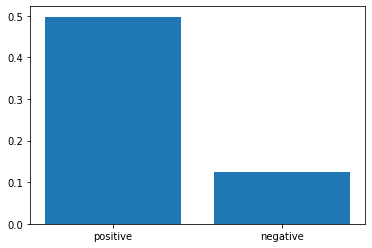

Enter Topic : BJP
                                          description  \
0   Indian Prime Minister Narendra Modi's Bharatiy...   
1   Bharatiya Janata party claims biggest electora...   
2   Former India central bank governor and renowne...   
3   A heated war of words between top Pakistani an...   
4   BJP MP Locket Chatterjee called TMC National S...   
..                                                ...   
95  Congress welcomes the support of former RBI go...   
96  The bail plea was listed before a Delhi High C...   
97  The Opposition party, which has alleged that v...   
98  While Giriraj said Rohini had "set an example ...   
99  In Tuesday’s editorial, the Saamana said, “The...   

                                              content  
0   AHMEDABAD, India, Dec 8 (Reuters) - Indian Pri...  
1   The Indian prime minister, Narendra Modi, was ...  
2   NEW DELHI, Dec 14 (Reuters) - Former India cen...  
3   Diplomatic tensions are high between old rival...  
4   A 1998 video 

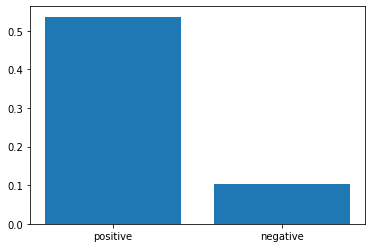

In [120]:
def conversion(all_articles):
  DF = pd.DataFrame.from_dict(all_articles)
  df=DF['articles'].apply(pd.Series)
  DF= df[["description", "content"]]

  return DF

def Preprocessing(DF):
  DF['description'] = DF['description'].str.replace(r'<[^<>]*>', '', regex=True)
  DF['content'] = DF['content'].str.replace(r'<[^<>]*>', '', regex=True)
  DF = DF.replace(r'\n',' ', regex=True) 
  DF = DF.replace(r'\r',' ', regex=True) 
  print(DF.apply(pd.Series))
  return DF



def Calculate(DF):
  l_des=[]
  for i in range (0,100):
    text=DF['description'][i]
    blob=TextBlob(text)
    senti=blob.sentiment.polarity
    l_des.append(senti)


  l_cont=[]
  for i in range (0,100):
    text=DF['content'][i]
    blob=TextBlob(text)
    senti=blob.sentiment.polarity
    l_cont.append(senti)

  l_cont_p=[]
  l_cont_n=[]
  for i in l_cont:
    if (i>0.000000):
      l_cont_p.append(i)
    else:
      l_cont_n.append(i)

  l_des_p=[]
  l_des_n=[]
  for i in l_des:
    if (i>0.000000):
      l_des_p.append(i)
    else:
      l_des_n.append(i)

  sumP=((sum(l_cont_p))/len(l_cont_p))+ ((sum(l_des_p))/len(l_des_p))
  sumN=((sum(l_cont_n))/len(l_cont_n))+((sum(l_des_n))/len(l_des_n))
  Result=np.array([sumP,abs(sumN)])

  return Result




for i in range(0,5):
  print("Enter Topic : ",end='')
  q=input()
  all_articles = newsapi.get_everything(q,from_param='2022-12-01',to='2022-12-22',language='en')
  DF=conversion(all_articles)
  DF=Preprocessing(DF)
  Result=Calculate(DF)
  label=["positive","negative"]
  plt.bar(label,Result)
  plt.show()